In [2]:
# This strategy assumes predictible returns based on last X number of bars and the relation between O,H,L,C.

In [3]:
import datetime
import pandas as pd
import tstables  
import tables 
import _create_research_data as bt_input
import numpy as np

In [4]:
symbol = 'EUR_USD'
granularity = '1H'

filename = '{}_{}.hdf'.format(symbol, granularity)
df = bt_input.read_hdf_file(filename)
df = df[['bid_o', 'bid_h', 'bid_l', 'bid_c', 'volume']]
df.columns = ['open', 'high', 'low', 'close', 'volume']
#df.head()

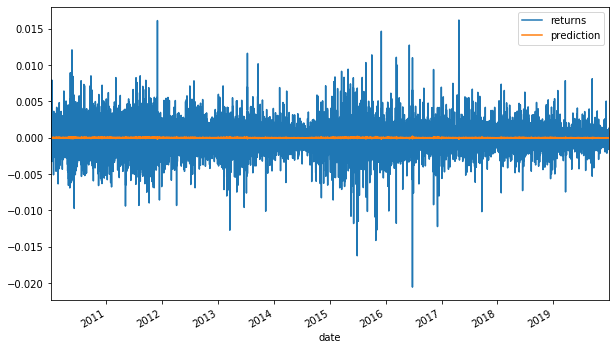

In [5]:
# From YH's book:

df['returns'] = np.log(df['close'] / df['close'].shift(1))

df.dropna(inplace=True)

lags = 3

cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    df[col] = df['returns'].shift(lag)
    cols.append(col)

df.dropna(inplace=True)

reg = np.linalg.lstsq(df[cols], df['returns'], rcond=None)[0]

df['prediction'] = np.dot(df[cols], reg)

df[['returns', 'prediction']].iloc[lags:].plot(figsize=(10, 6))


In [6]:
hits = np.sign(df['returns'] * df['prediction']).value_counts()
hits.values[0] / sum(hits)

0.5068964418819482

In [10]:
reg = np.linalg.lstsq(df[cols], np.sign(df['returns']), rcond=None)[0]

df['prediction'] = np.sign(np.dot(df[cols], reg))

hits = np.sign(df['returns'] * df['prediction']).value_counts()
hits.values[0] / sum(hits)


0.5250055744911286